# Линейная регрессия

## 1. Пример задачи регрессии: предсказание прибыли магазина

Пусть известен один признак — прибыль магазина в прошлом месяце, а предсказать необходимо прибыль магазина в следующем. Поскольку прибыль — вещественная переменная, здесь идет речь о задаче регрессии.

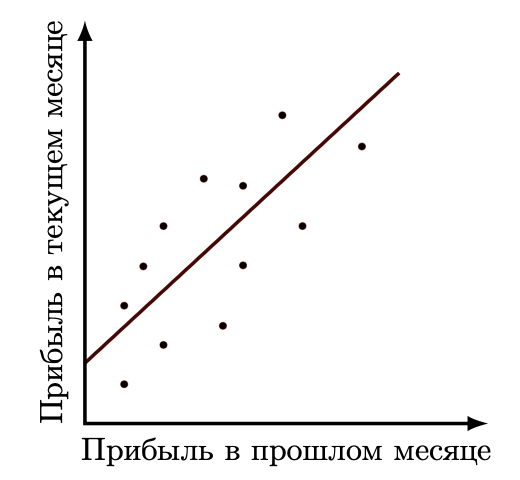

По этому графику можно сделать вывод о существовании зависимости между прибылью в следующем и прошлом месяцах. Если предположить, что зависимость приблизительно линейная, ее можно представить в виде прямой на этом графике. По этой прямой и можно будет предсказывать прибыль в следующем месяце, если известна прибыль в прошлом.

В целом такая модель угадывает тенденцию, то есть описывает зависимость между ответом и признаком. При этом, разумеется, она делает это не идеально, с некоторой ошибкой. Истинный ответ на каждом объекте несколько отклоняется от прогноза.

Один признак — это не очень серьезно. Гораздо сложнее и интереснее работать с многомерными выборками, которые описываются большим количеством признаков. В этом случае нарисовать выборку и понять, подходит или нет линейная модель, нельзя. Можно лишь оценить ее качество и по нему уже понять, подходит ли эта модель.

Следует отметить, что вообще нельзя придумать модель, которая идеально описывает ваши данные, то есть идеально описывает, как порождается ответ по признакам.

## 2. Описание линейной модели

Далее обсудим, как выглядит семейство алгоритмов в случае с линейными моделями. Линейный алгоритм в задачах регрессии выглядит следующим образом:

$$a(x) = w_0 + \sum_{j = 1}^{d} w_j x^j,$$

где $w_0$ — свободный коэффициент, $x^j$ — признаки, а $w_j$ — их веса.

Если добавить ($d$ + 1)-й признак, который на каждом объекте принимает значение 1, линейный алгоритм
можно будет записать в более компактной форме

$$a(x) = \sum_{j = 1}^{d + 1} w_j x^j = \langle w, x \rangle,$$

где используется обозначение $\langle w, x \rangle$ для скалярного произведения двух векторов.

В качестве меры ошибки не может быть выбрано отклонение от прогноза $Q(a, y) = a(x) − y$, так как в этом случае минимум функционала не будет достигаться при правильном ответе $a(x) = y$. Самый простой способ — считать модуль отклонения:
$$| a(x) - y |.$$

In [ ]:
# x_1: отклонение = -5
# x_2: отклонение = +5

# отклонение = 0


# x_1: отклонение = |-5|
# x_2: отклонение = |+5|

# отклонение = 10

# квадратичная ошибка
# a(x) - скаляр
# y - скаляр

Но функция модуля не является гладкой функцией, и для оптимизации такого функционала неудобно использовать градиентные методы. Поэтому в качестве меры ошибки часто выбирается квадрат отклонения:

$$(a(x) - y)^2.$$

Функционал ошибки, именуемый среднеквадратичной ошибкой алгоритма, задается следующим образом:

$$Q(a, X) = \frac{1}{l} \sum_{i = 1}^{l} ( a(x_i) - y_i)^2$$

В случае линейной модели его можно переписать в виде функции (поскольку теперь Q зависит от вектора, а не от функции) ошибок:

$$Q(w, X) = \frac{1}{l} \sum_{i = 1}^{l} ( \langle w, x_i \rangle - y_i)^2.$$

## 3. Обучение модели линейной регрессии

В этом блоке речь пойдет о том, как обучать модель линейной регрессии, то есть как настраивать ее параметры. Выше было введено следующее выражение для качества линейной модели на обучающей выборке:

$$Q(w, X) = \frac{1}{l} \sum_{i = 1}^{l} ( \langle w, x_i \rangle - y_i)^2 \rightarrow \min_{w}.$$

Следует напомнить, что в число признаков входит также постоянный признак, равный 1 для всех объектов, что позволяет исключить постоянную составляющую в последнем соотношении.

### 3.1. Переход к матричной форме записи

Прежде, чем будет рассмотрена задача оптимизации этой функции, имеет смысл переписать используемые соотношения в матричной форме. Матрица «объекты–признаки» $X$ составлена из признаковых описаний всех объектов из обучающей выборки:

$$
X = 
\begin{pmatrix}
    x_{11}   & ... & x_{1d} \\
    ...      & ... & ... \\
    x_{l1}   & ... & x_{ld}
\end{pmatrix}
$$

Таким образом, в $ij$ элементе матрицы $X$ записано значение $j$-го признака на $i$ объекте обучающей выборки. Также понадобится вектор ответов $y$, который составлен из истинных ответов для всех объектов:

$$
y = 
\begin{pmatrix}
    y_{1}  \\
    ...     \\
    y_{l}
\end{pmatrix}
$$

В этом случае среднеквадратичная ошибка может быть переписана в матричном виде:

$$Q(w, X) = \frac{1}{l} || X w - y ||^2 \rightarrow \min_{w}.$$

Эта формула пригодится, в частности, при реализации линейной регрессии на компьютере.

### 3.2. Аналитический метод решения

Можно найти аналитическое решение задачи минимизации:

$$ w_{*} = (X^T X)^{-1} X^T y.$$

Основные сложности при нахождении решения таким способом:

> Для нахождения решения необходимо вычислять обратную матрицу. Операция обращения матрицы требует, в случае $d$ признаков, выполнение порядка $d^3$ операции, и является вычислительно сложной уже в задачах с десятком признаков.

> Численный способ нахождения обратной матрицы не может быть применен в некоторых случаях (когда матрица плохо обусловлена).

p.s. **числом (или мерой) обусловленности** матрицы называют величину равную произведению норм матрицы $A$ и ее обратной.

### 3.3. Оптимизационный подход к решению

Другой, несколько более удобный, способ найти решение — использовать численные методы оптимизации.

Несложно показать, что среднеквадратическая ошибка — это выпуклая и гладкая функция. Выпуклость гарантирует существование лишь одного минимума, а гладкость — существование вектора градиента в каждой точке. Это позволяет использовать метод градиентного спуска.

При использовании метода градиентного спуска необходимо указать начальное приближение. Есть много
подходов к тому, как это сделать, в том числе инициализировать случайными числами (не очень большими).

Самый простой способ это сделать — инициализировать значения всех весов равными нулю:
$$w^0 = 0.$$

На каждой следующей итерации, $t = 1, 2, 3, ...,$ из приближения, полученного в предыдущей итерации $w_{t−1}$, вычитается вектор градиента в соответствующей точке $w_{t−1}$, умноженный на некоторый коэффициент $\eta_t$, называемый шагом:

$$w^t = w^{t - 1} - \eta_t \nabla Q(w^{t - 1}, X).$$

Остановить итерации следует, когда наступает сходимость. Сходимость можно определять по-разному. В данном случае разумно определить сходимость следующим образом: итерации следует завершить, если разница двух последовательных приближений не слишком велика:

$$|| w^t - w^{t - 1} || \leq \epsilon.$$

## 4. Градиентный спуск для линейной регрессии

### 4.1. Случай парной регрессии

В случае парной регрессии признак всего один, а линейная модель выглядит следующим образом:

$$ a(x) = w_1 x + w_0,$$

где $w_0$ и $w_1$ - два параметра.

Среднеквадратичная ошибка принимает вид:
    
$$Q(w_0, w_1, X) = \frac{1}{l} \sum_{i = 1}^{l} (w_1 x_i + w_0 - y_i)^2.$$

Для нахождения оптимальных параметров будет применяться метод градиентного спуска, про который уже было сказано ранее. Чтобы это сделать, необходимо сначала вычислить частные производные функции ошибки:

$$ \frac{\partial Q}{\partial w_1} = \frac{2}{l} \sum_{i = 1}^{l} (w_1 x_i + w_0 - y_i) x_i, \ \ \ \ \  \frac{\partial Q}{\partial w_0} = \frac{2}{l} \sum_{i = 1}^{l} (w_1 x_i + w_0 - y_i).$$

Пример:

$$w^0: w_1 = 0, w_0 = 0$$


$$\nabla Q(w^0, X) =  \begin{pmatrix}
    \frac{\partial Q}{\partial w_1}  \\
    \frac{\partial Q}{\partial w_0}
\end{pmatrix}
$$

$$\nabla Q(w^0, X) =  \begin{pmatrix}
    - \frac{2}{l} \sum_{i = 1}^{l} x_i y_i  \\
    - \frac{2}{l} \sum_{i = 1}^{l} y_i
\end{pmatrix}
$$

$$ w^1 = w^0 - 0.5 * \nabla Q(w^0, X)$$


### 4.2. Демонстрация градиентного спуска в случае парной регрессии

Следующие два графика демонстрируют применение метода градиентного спуска в случае парной регрессии. Справа изображены точки выборки, а слева — пространство параметров. Точка в этом пространстве обозначает конретную модель.

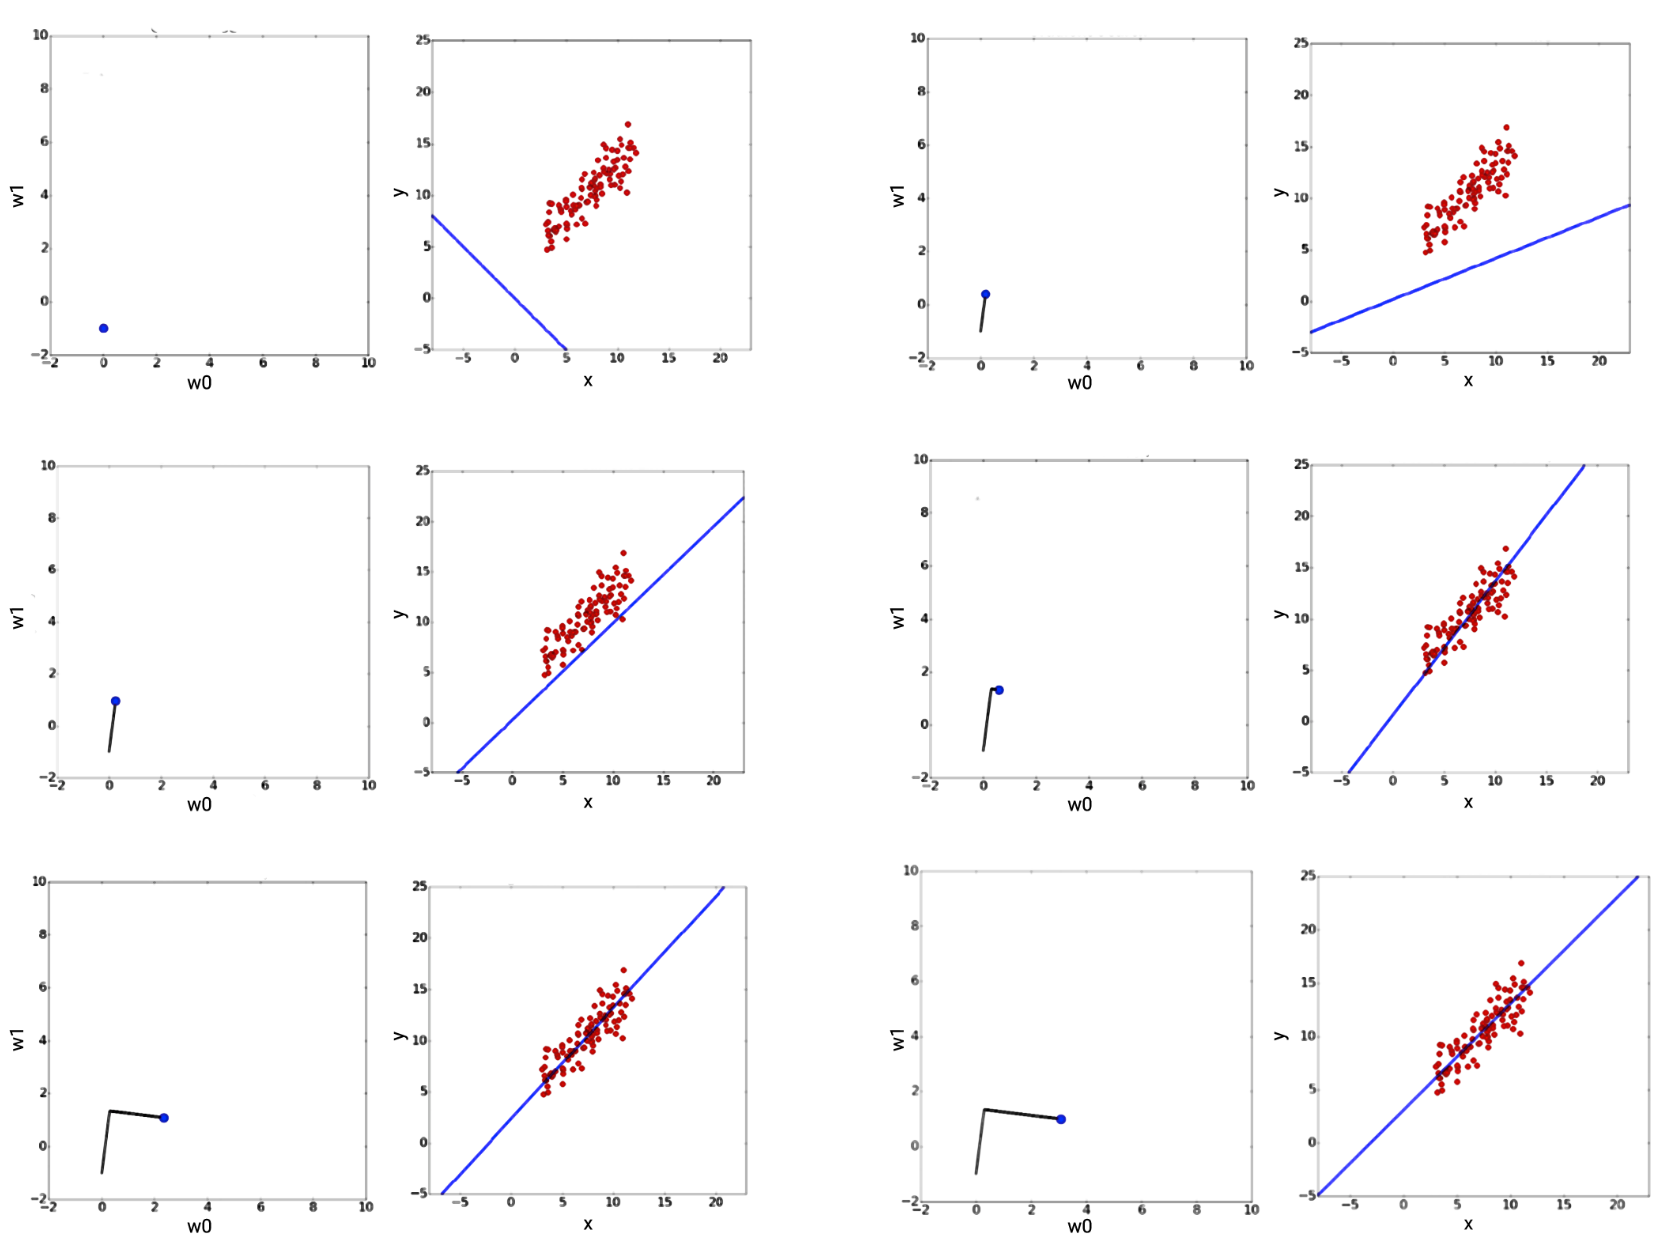

График зависимости функции ошибки от числа произведенных итераций выглядит следующим образом:
    
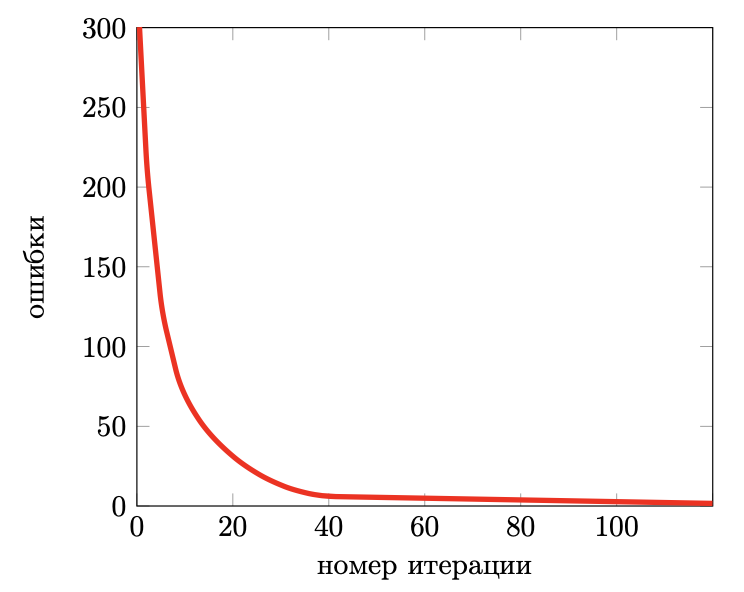

### 4.3. Выбор размера шага в методе градиентного спуска

Очень важно при использовании метода градиентного спуска правильно подбирать шаг. Каких-либо конкретных правил подбора шага не существует, выбор шага — это искусство, но существует несколько полезных закономерностей.

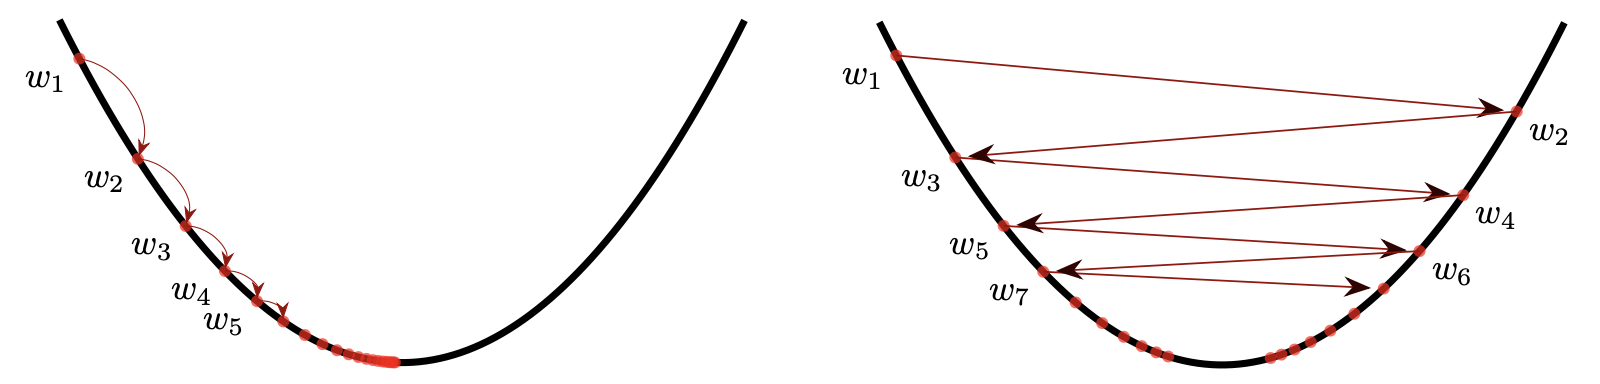

Если длина шага слишком мала, то метод будет неспеша, но верно шагать в сторону минимума. Если же взять размер шага очень большим, появляется риск, что метод будет перепрыгивать через минимум. Более того, есть риск того, что градиентный спуск не сойдется.

Имеет смысл использовать переменный размер шага: сначала, когда точка минимума находится еще далеко, двигаться быстро, а позже, спустя некоторое количество итерации — делать более аккуратные шаги. Один из способов задать размер шага следующий:

$$ \eta_t = \frac{k}{t},$$

где $k$ — константа, которую необходимо подобрать, а $t$ — номер шага.

### 4.4. Случай многомерной линейной регрессии

В случае многомерной линейной регрессии используется тот же самый подход — необходимо решать задачу минимизации:

$$Q(w, X) = \frac{1}{l} || X w - y ||^2 \rightarrow \min_{w}.$$

где $|| x ||$ - норма вектора x.

Формула для вычисления градиента принимает следующий вид:

$$\nabla_w Q(w, X) = \frac{2}{l} X^T (X w - y)$$

Стоит отметить, что вектор $X w − y$, который присутствует в данном выражении, представляет собой вектор ошибок.